# Measure of central tendency
* Mean
* Median
* Mode

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [63]:
age = [23, 24, 32, 45, 12, 43, 67, 45, 32, 56, 32, 120]

In [64]:
statistics.mean(age)

44.25

In [65]:
statistics.median(age)

37.5

In [66]:
statistics.mode(age)

32

<Axes: >

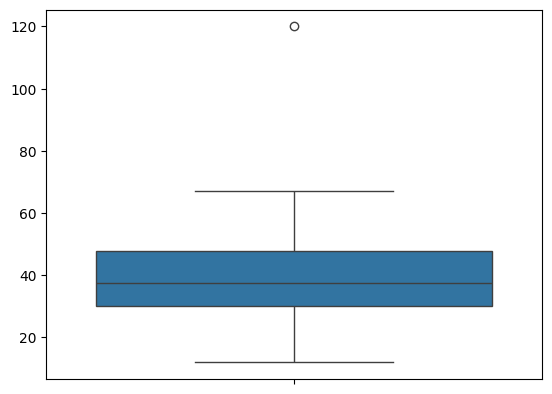

In [67]:
sns.boxplot(age)

In [69]:
# 5 number summary (Outlier detection)
q1, q3 = np.percentile(age, [25,75])
IQR = q3 - q1
lower_fence = q1-1.5*(IQR)
higher_fence = q3+1.5*(IQR)
print(lower_fence, higher_fence)

3.375 74.375


# Measure of dispersion
* Variance
* Standard Deviation

In [73]:
statistics.variance(age)

795.2954545454545

In [74]:
np.var(age, axis=0)

np.float64(729.0208333333334)

In [75]:
def variance(data):
  n=len(age)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/n
  return variance

In [76]:
variance(age)

729.0208333333334

In [77]:
statistics.pvariance(age)

729.0208333333334

<Axes: ylabel='Count'>

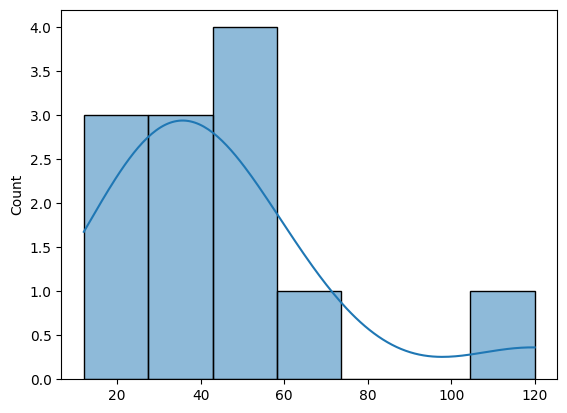

In [85]:
# Histogram
sns.histplot(age, kde=True)

In [86]:
df = sns.load_dataset('penguins')

In [87]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='body_mass_g', ylabel='Count'>

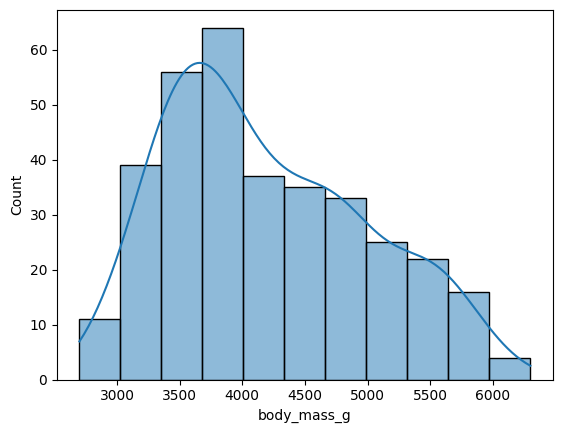

In [88]:
sns.histplot(df['body_mass_g'], kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

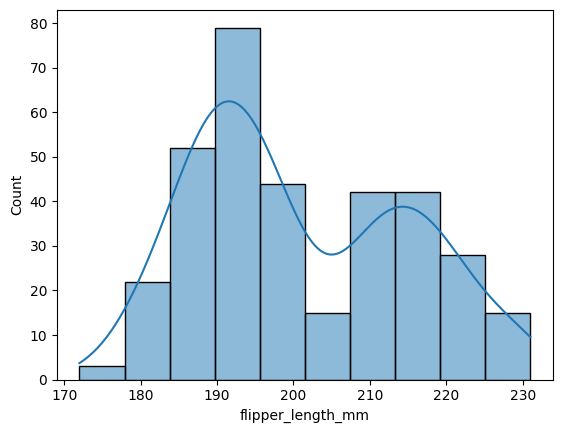

In [91]:
sns.histplot(df['flipper_length_mm'], kde=True)

In [92]:
# Create a normal distributed data
s = np.random.normal(0.5, 2, 1000)

In [93]:
s

array([-1.53735474e+00, -2.56820730e+00,  3.05886135e+00,  9.42195547e-01,
        1.60549785e+00, -6.28015696e-01,  4.46404772e+00,  1.15299107e+00,
        2.39755338e+00,  1.05471885e+00,  9.41610454e-01,  1.48662064e+00,
        1.70935814e+00, -1.55516170e+00, -1.24507852e+00,  3.36794721e-01,
        5.09617067e-01, -1.65397300e+00,  1.05317381e+00,  1.97352574e-01,
        1.29338803e+00, -4.13038077e+00,  3.73173333e+00, -5.76362068e-02,
       -3.32971593e-01,  1.31476312e+00, -3.86681712e+00,  2.31706779e+00,
       -1.79930281e+00,  1.75780468e+00,  1.67550888e+00,  2.93199394e+00,
        3.17641521e-01,  2.47171778e+00, -9.77865179e-01,  1.03323936e+00,
       -8.25508210e-01,  1.64882250e-01, -1.41220686e+00,  5.72741238e-01,
       -7.46545849e-01, -3.34973515e+00,  1.39540375e+00,  2.56208644e+00,
        2.08859175e+00,  8.10278283e-01,  1.29325063e+00, -1.48421857e+00,
        3.85037060e+00,  2.34589630e-01, -3.03730571e+00,  1.90738118e-01,
        1.44571068e+00,  

<Axes: ylabel='Count'>

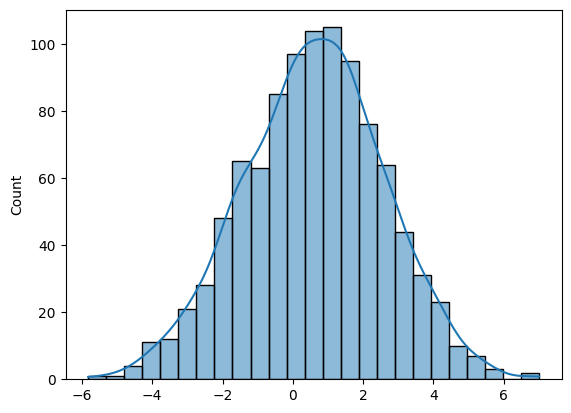

In [94]:
sns.histplot(s, kde=True)

In [95]:
# Log normal distribution
meu, sigma = 3., 1.
s = np.random.lognormal(meu, sigma, 100)

<Axes: ylabel='Count'>

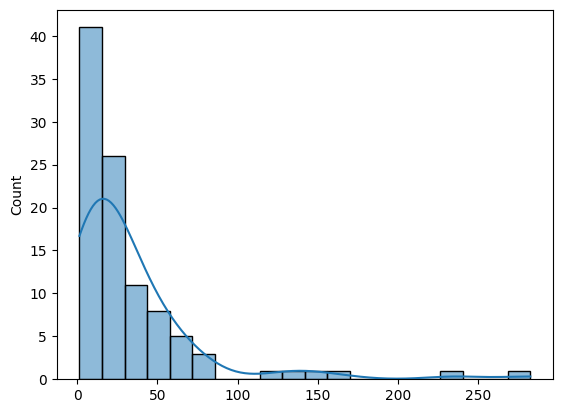

In [96]:
sns.histplot(s, kde=True)

<Axes: ylabel='Count'>

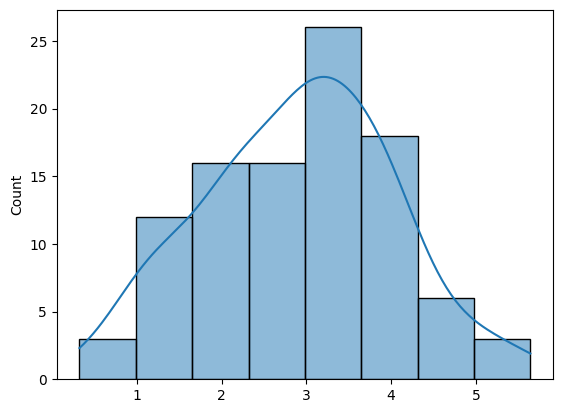

In [98]:
sns.histplot(np.log(s), kde=True)

In [101]:
#### If you want to check whether feature is gaussian or normal distributed
#### Q-Q plot
import scipy.stats as stat
import pylab 

def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample, kde=True)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

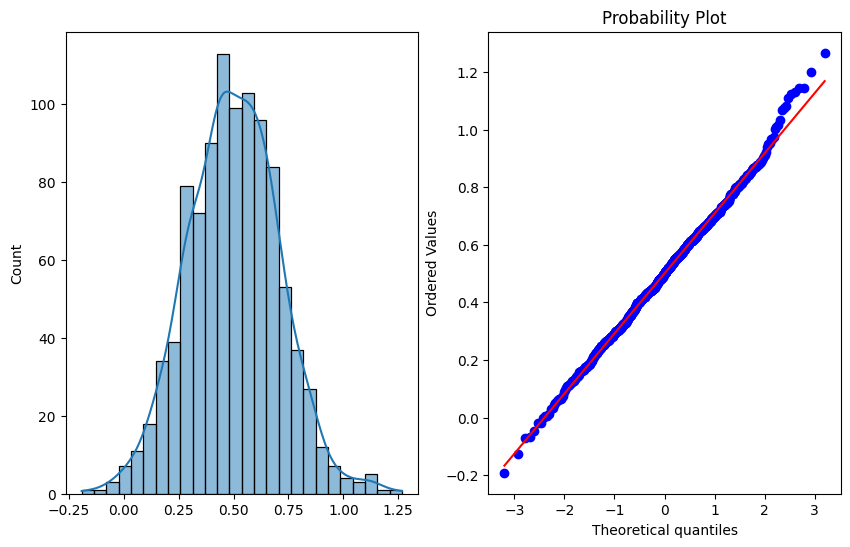

In [102]:
s = np.random.normal(0.5, 0.2, 1000)
plot_data(s)

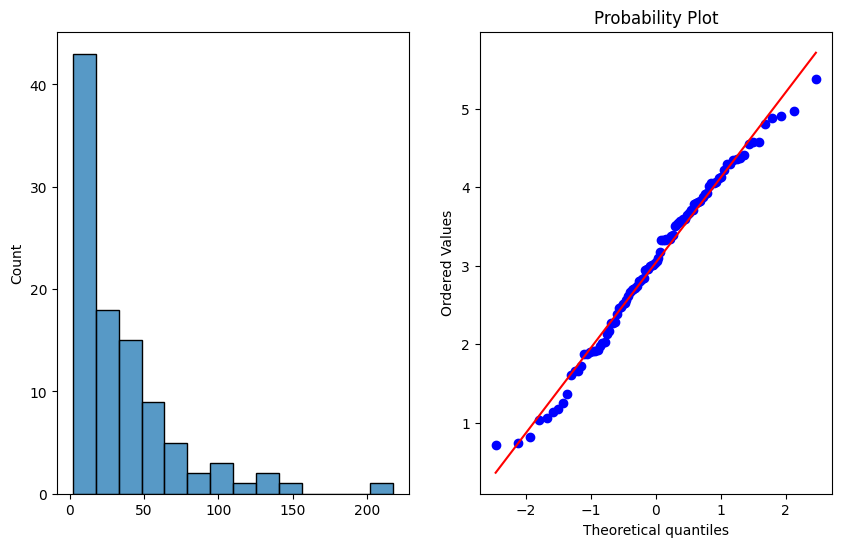

In [103]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

plot_data_log(sample)

In [105]:
# Person and spearman rank correlation
# Calculate correlation only on numeric columns
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


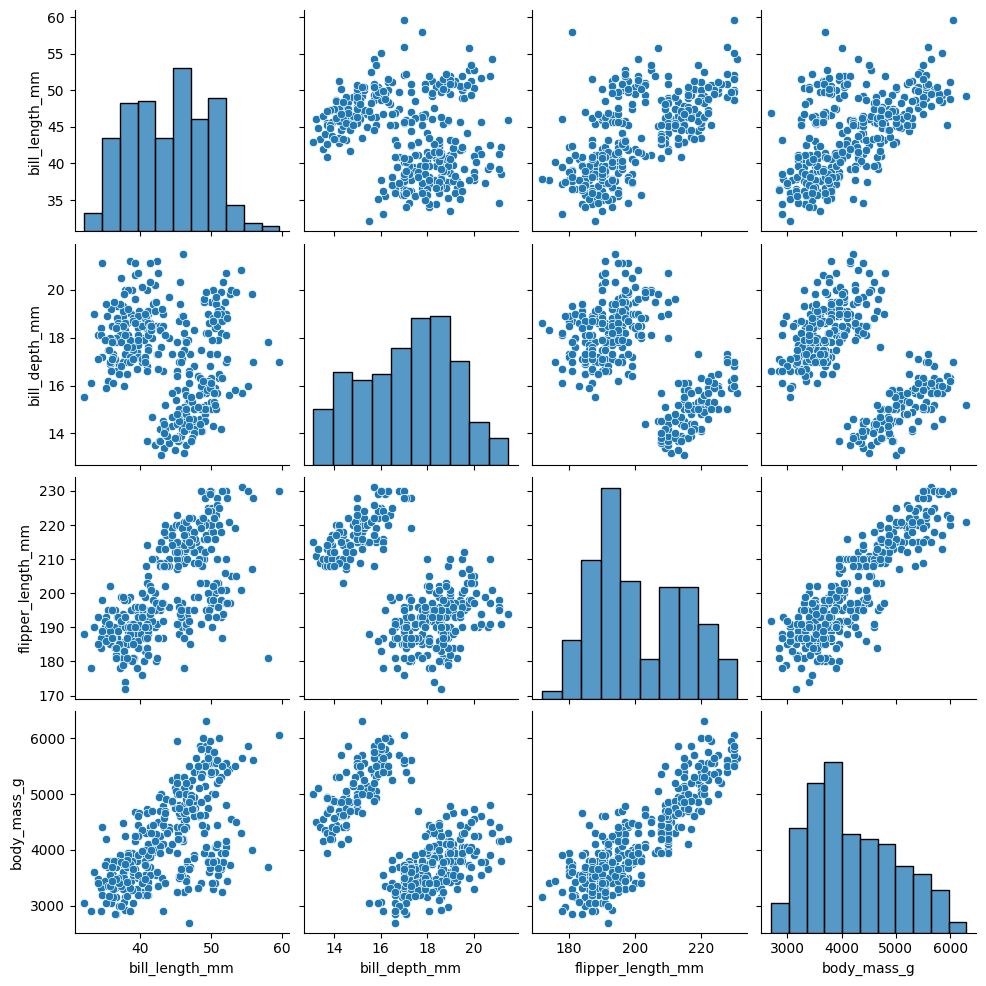

In [106]:
sns.pairplot(df)